In [1]:
import openpyxl
import datetime
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tables = openpyxl.load_workbook("lab1.xlsx").worksheets

In [3]:
def print_table_dka(table, dpi=150, lw=0.7):
    file_columns = list(map(lambda x: x[1:], table.iter_cols(0, 2, values_only=True)))
    if type(file_columns[1][1]) is datetime.datetime:
        file_columns = file_columns[::-1]
    while True:
        if file_columns[0][-1] is None or file_columns[1][-1] is None:
            file_columns[0] = file_columns[0][:-1]
            file_columns[1] = file_columns[1][:-1]
        else:
            break
    
    # просто вытягиваю значения и время (я в xlsx файле подшаманил чуть-чуть даты, чтоб на графиках не слипалось - отдалил их друг от друга на паур дней)
    [times, summs] = file_columns
    summs = [float(str(i).replace(" ", "").replace(",", ".")) for i in summs]

    # смещения R(1)
    Rs = [abs(summs[i] - summs[i-1]) for i in range(1, len(summs))]

    X_mean = np.mean(summs)
    R_mean = np.mean(Rs)

    # а тут формулы граничных значений тупо из госта взяты 
    X_upper = X_mean + 2.66 * R_mean
    X_lower = X_mean - 2.66 * R_mean

    R_upper = 3.267 * R_mean
    R_lower = 0

    # рисовалки
    fig, ax = plt.subplots(2, 1, dpi = dpi)
    ax[0].tick_params(axis='x', labelrotation=90)
    ax[0].set_title("Оценка для X")
    ax[0].plot(times, summs, label = "Сумма", marker='.', lw=lw)
    ax[0].plot([times[0], times[-1]], [X_mean] * 2, label = f"Центральная линия ({round(X_mean, 2)})", lw=lw)
    ax[0].plot([times[0], times[-1]], [X_upper] * 2, label = f"Верхняя граница ({round(X_upper, 2)})", lw=lw)
    ax[0].plot([times[0], times[-1]], [X_lower] * 2, label = f"Нижняя граница ({round(X_lower, 2)})", lw=lw)
    ax[0].legend(loc="upper left", bbox_to_anchor=(1,1), prop={'size': 8})


    for i in range(len(summs)):
        if (summs[i] > X_upper or summs[i] < X_lower):
            ax[0].scatter(times[i], summs[i], color='red', s=10, zorder=2)

    ax[1].tick_params(axis='x', labelrotation=90)
    ax[1].set_title("Оценка для R")
    ax[1].plot(times[1:], Rs, label = "Смещение", marker='.', lw=lw)
    ax[1].plot([times[1], times[-1]], [R_mean] * 2, label = f"Центральная линия ({round(R_mean, 2)})", lw=lw)
    ax[1].plot([times[1], times[-1]], [R_upper] * 2, label = f"Верхняя граница ({round(R_upper, 2)})", lw=lw)
    ax[1].plot([times[1], times[-1]], [R_lower] * 2, label = f"Нижняя граница ({round(R_lower, 2)})", lw=lw)
    ax[1].legend(loc="upper left", bbox_to_anchor=(1,1), prop={'size': 8})

    for i in range(len(Rs)):
        if (Rs[i] > R_upper or Rs[i] < R_lower):
            ax[1].scatter(times[i + 1], Rs[i], color='red', s=10, zorder=2)

    fig.tight_layout()
    plt.show()

## 1

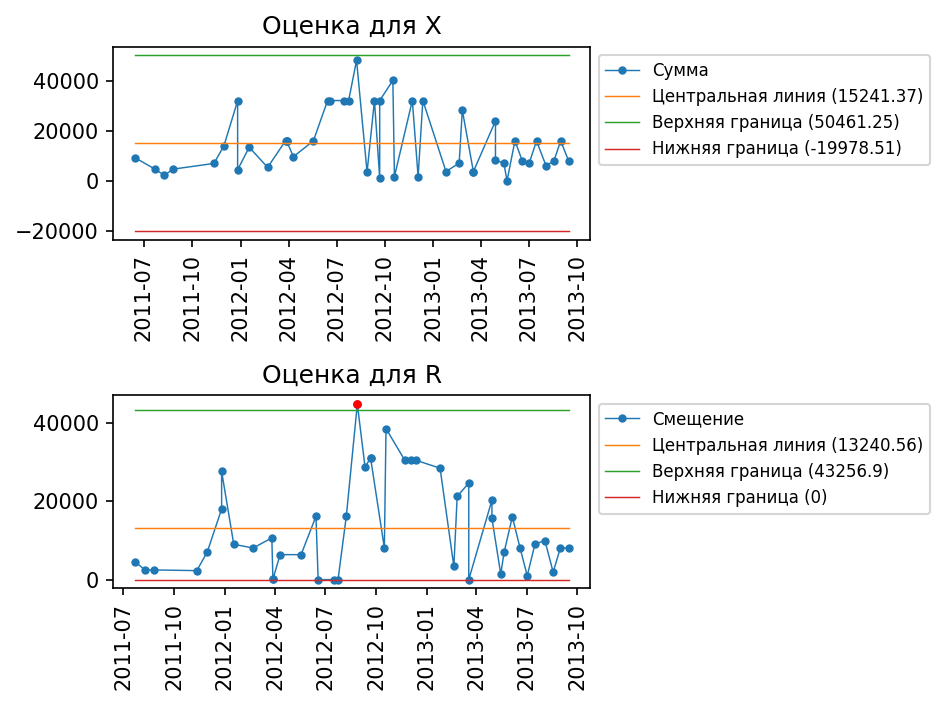

In [4]:
print_table_dka(tables[0])

Лояльная, cкорее всего выброс коротковременного роста

## 2

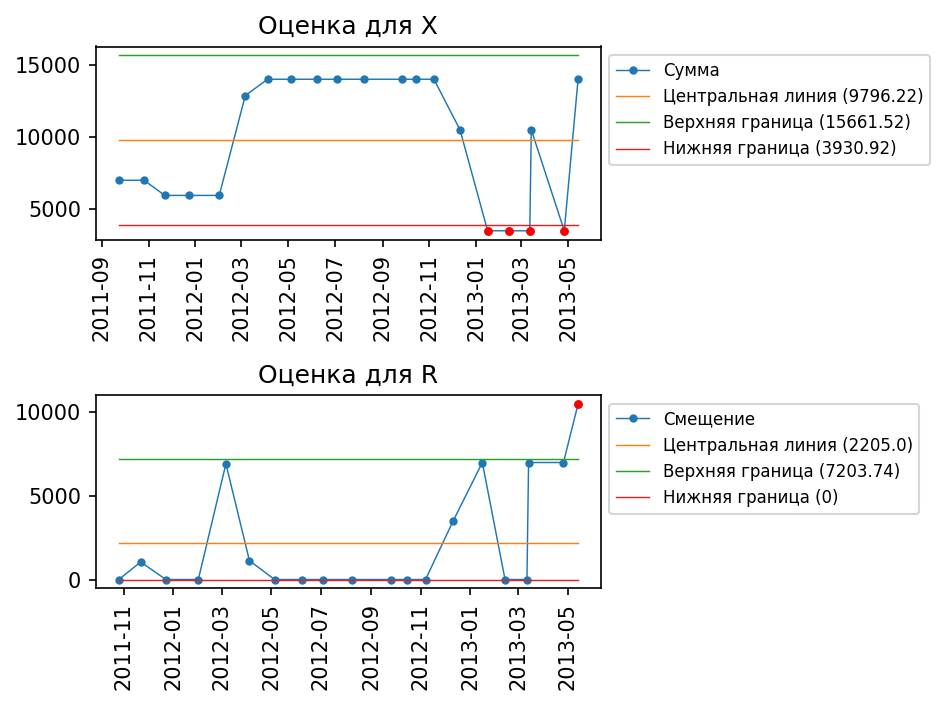

In [183]:
print_table_dka(tables[1])

До 2012-02 - старые значения компании

С 2012-02 по 2012-04 - резкий подъем (возможно появилась новая продаваемая услуга)

С 2012-12 появилась какая-то проблема - сильное падение, сопровождаемое последующими проблемными точками 

## 3

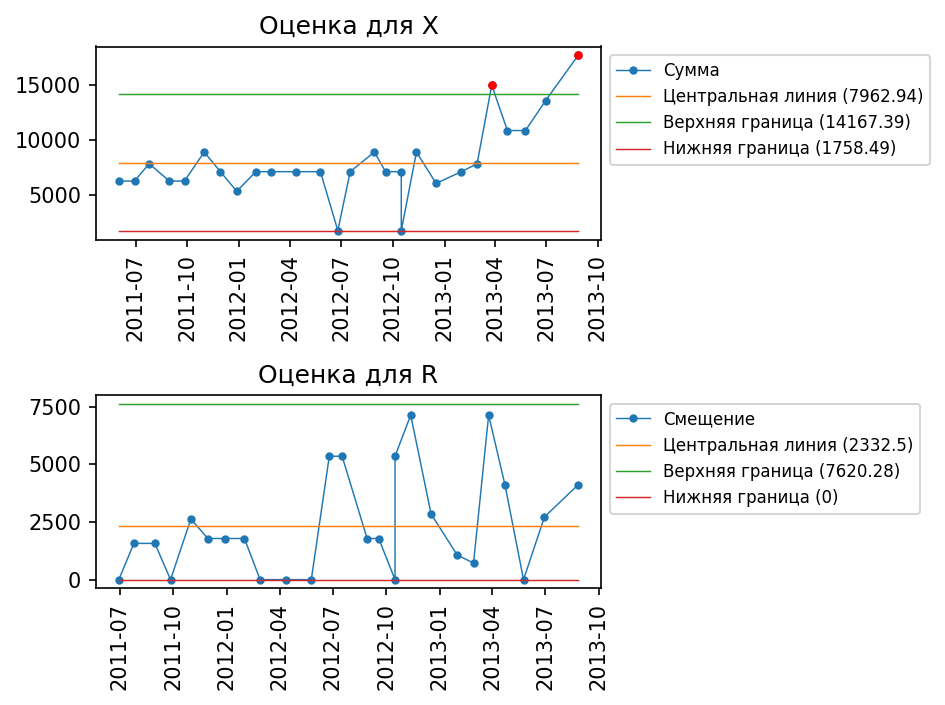

In [184]:
print_table_dka(tables[2])

Наглядный рост

Возможно заниженные значения перед ростом - инвестиции, приведшие к росту

## 4

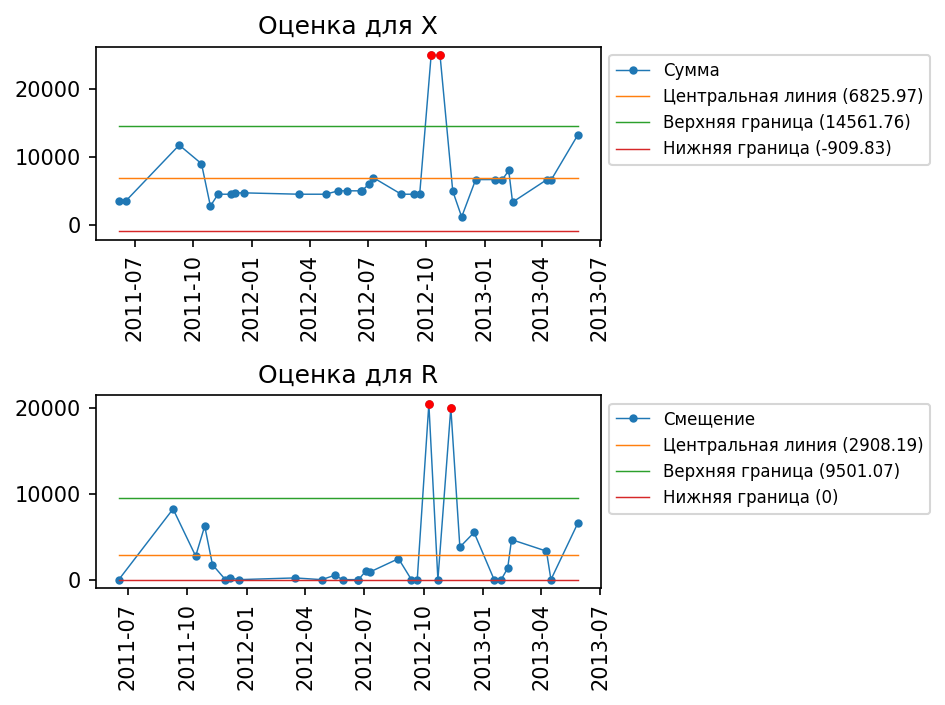

In [185]:
print_table_dka(tables[3])

Лояльная компания.

А аномальный прирост может быть следствием коротковременного повышения спроса на определенные услуги (возможно сезонные, т.к. менее заметный рост наблюдался приблизительно год назад в 2011-09)

## 5

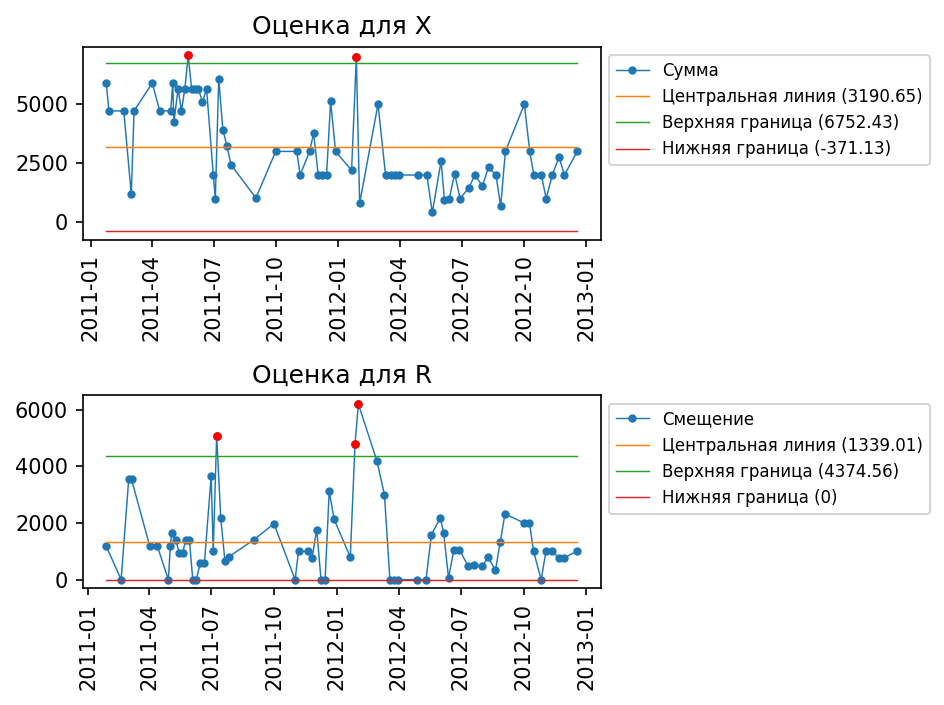

In [186]:
print_table_dka(tables[4])

Даны более хаотичные данные из-за чего сложнее сделать вывод.

Скорее всего тут есть проблема, т.к. после аномального выпада в 2012-02 суммы компании стали низки.

Но при этом к концу 2012 данный упадок удалось компенсировать

## 6

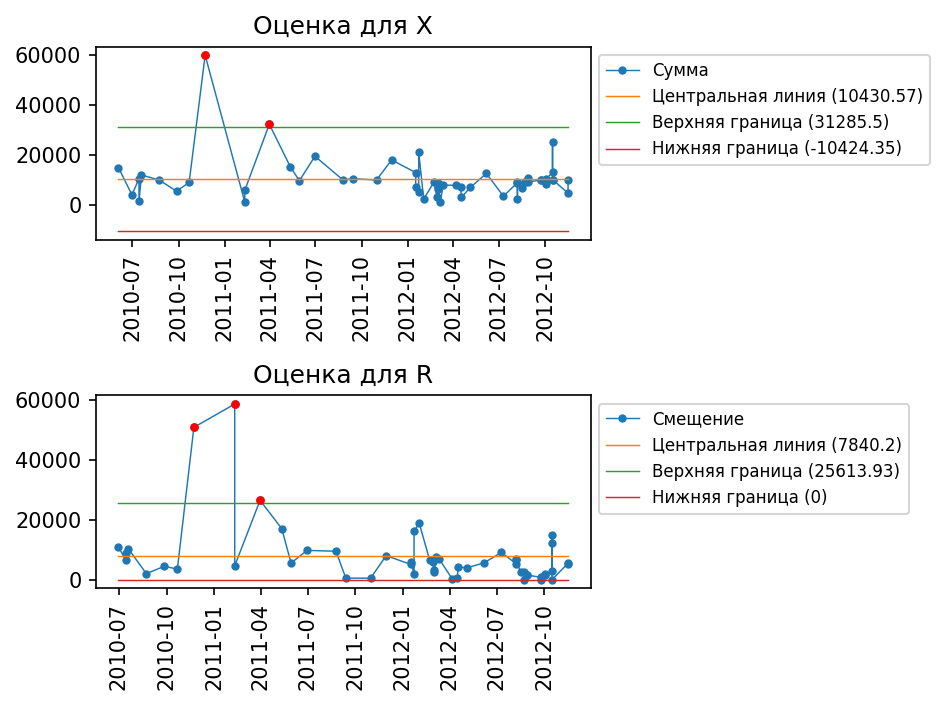

In [187]:
print_table_dka(tables[5])

Лояльная компания (похожий случай)

А аномальный прирост может быть следствием коротковременного повышения спроса на определенные услуги